<a href="https://colab.research.google.com/github/intertech-academy/image_processing_py/blob/main/CPO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Balans bieli

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import skimage.color

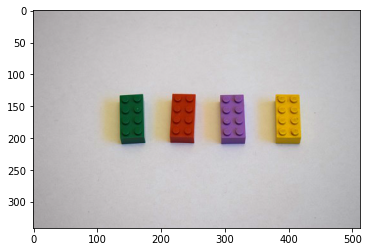

In [3]:
im1 = np.array(Image.open('bricks1.jpg'))
im1 = (im1 - np.min(im1)) / (np.max(im1) - np.min(im1))

plt.imshow(im1)

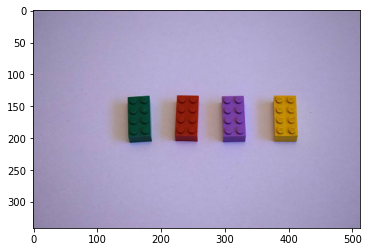

In [5]:
im2 = np.array(Image.open('bricks2.JPG'))
im2 = (im2 - np.min(im2)) / (np.max(im2) - np.min(im2))

plt.imshow(im2)

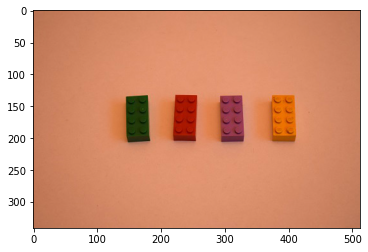

In [6]:
im3 = np.array(Image.open('bricks3.jpg'))
im3 = (im3 - np.min(im3)) / (np.max(im3) - np.min(im3))

plt.imshow(im3)

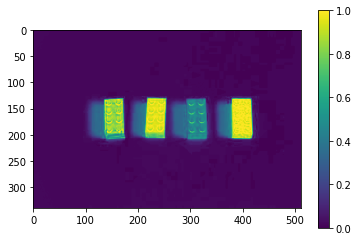

In [9]:
im1_hsv = skimage.color.rgb2hsv(im1)

plt.imshow(im1_hsv[:,:,1])
plt.colorbar()

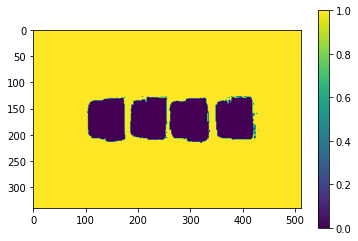

In [11]:
mask = im1_hsv[:,:,1] < 0.1
plt.imshow(mask)
plt.colorbar()

In [13]:
ind = np.argwhere(mask==1)
rows = ind[:,0]
cols = ind[:,1]

white_pixels1 = im1[rows, cols, :]
white_pixels1.shape

(153270, 3)

In [14]:
white1 = np.mean(white_pixels1, axis = 0)
white1.shape

(3,)

In [15]:
white1

array([0.7662467 , 0.75729393, 0.76526443])

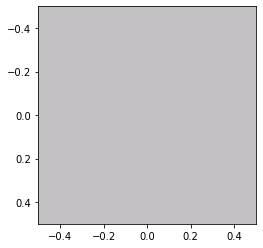

In [17]:
plt.imshow(np.reshape(white1, (1,1,3)))

In [18]:
white_pixels2 = im2[rows, cols, :]
white2 = np.mean(white_pixels2, axis = 0)
white2

array([0.66507282, 0.62764579, 0.78109119])

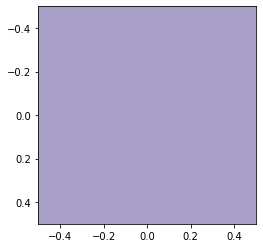

In [19]:
plt.imshow(np.reshape(white2, (1,1,3)))

In [20]:
corr_factors_2 = white1/white2
corr_factors_2

array([1.15212451, 1.20656259, 0.97973762])

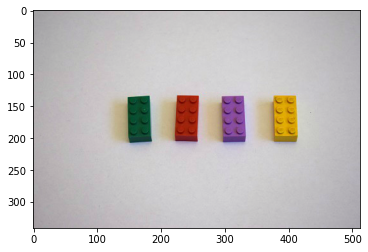

In [21]:
im2_cpy = im2.copy()

im2_cpy[:,:,0] = im2_cpy[:,:,0]*corr_factors_2[0]
im2_cpy[:,:,1] = im2_cpy[:,:,1]*corr_factors_2[1]
im2_cpy[:,:,2] = im2_cpy[:,:,2]*corr_factors_2[2]

plt.imshow(im2_cpy)

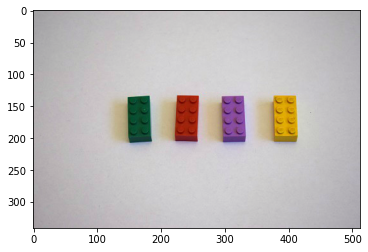

In [22]:
plt.imshow(im2*corr_factors_2)

In [23]:
white_pixels3 = im3[rows, cols, :]
white3 = np.mean(white_pixels3, axis = 0)
white3

array([0.8362888 , 0.54179421, 0.40625982])

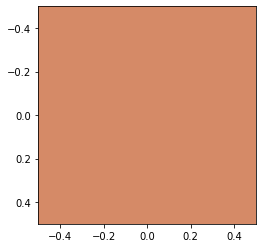

In [24]:
plt.imshow(np.reshape(white3, (1,1,3)))

In [26]:
corr_factors_3 = white1/white3
corr_factors_3

array([0.91624651, 1.39775198, 1.88368227])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


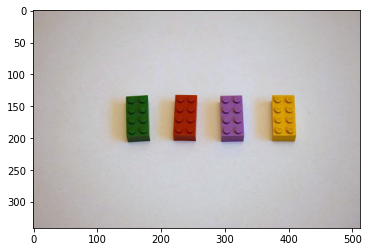

In [27]:
plt.imshow(im3 * corr_factors_3)